### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
faturamento_loja = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

print(f"Faturamento Loja 1: R$ {faturamento_loja:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")




Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


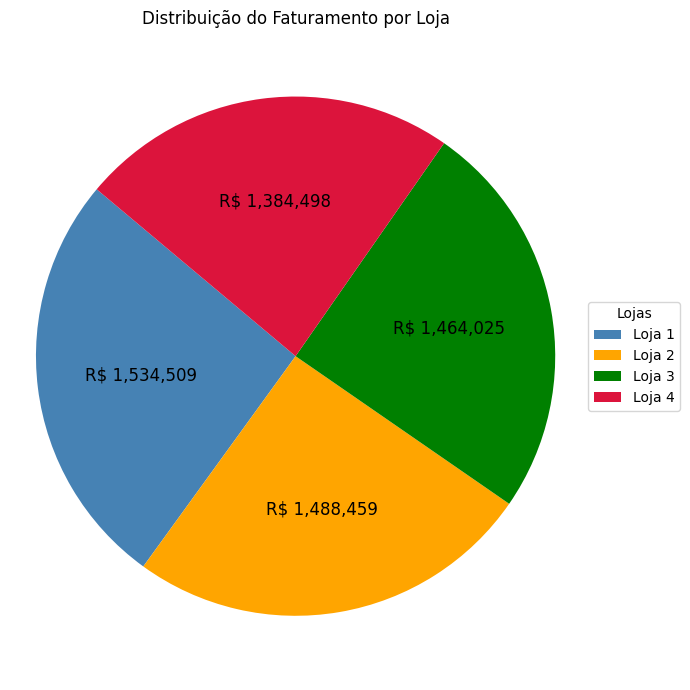

In [3]:
import matplotlib.pyplot as plt

faturamentos = [
    faturamento_loja,
    faturamento_loja2,
    faturamento_loja3,
    faturamento_loja4
]

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

cores = ["steelblue", "orange", "green", "crimson"]

def func_valores(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"R$ {absolute:,}"

plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    faturamentos,
    labels=None,
    colors=cores,
    autopct=lambda pct: func_valores(pct, faturamentos),
    startangle=140,
    textprops={'fontsize': 12}
)

plt.legend(wedges, lojas, title="Lojas", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Distribuição do Faturamento por Loja")
plt.axis('equal')
plt.tight_layout()
plt.show()




# 2. Vendas por Categoria


In [4]:
vendas_categoria_loja = loja["Categoria do Produto"].value_counts()
vendas_categoria_loja2 = loja2["Categoria do Produto"].value_counts()
vendas_categoria_loja3 = loja3["Categoria do Produto"].value_counts()
vendas_categoria_loja4 = loja4["Categoria do Produto"].value_counts()

print("** Loja 1 – Vendas por categoria:")
print(vendas_categoria_loja.to_string())
print("\n** Loja 2 – Vendas por categoria:")
print(vendas_categoria_loja2.to_string())
print("\n** Loja 3 – Vendas por categoria:")
print(vendas_categoria_loja3.to_string())
print("\n** Loja 4 – Vendas por categoria:")
print(vendas_categoria_loja4.to_string())


** Loja 1 – Vendas por categoria:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171

** Loja 2 – Vendas por categoria:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181

** Loja 3 – Vendas por categoria:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177

** Loja 4 – Vendas por categoria:
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos             

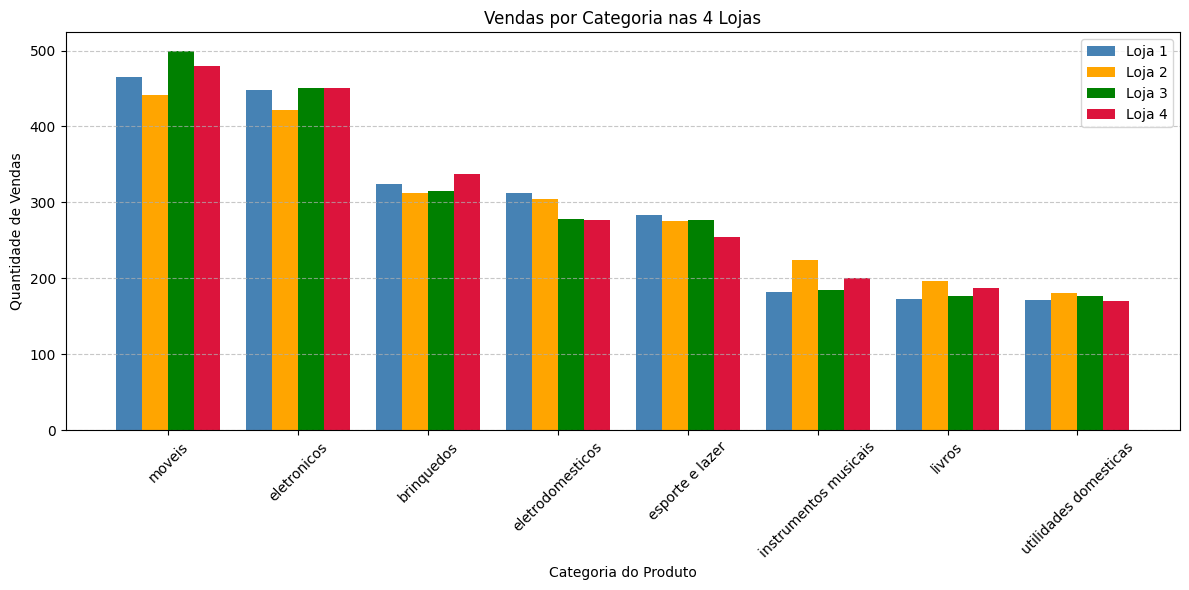

In [5]:
import numpy as np
import matplotlib.pyplot as plt

categorias = vendas_categoria_loja.index.tolist()

v1 = vendas_categoria_loja.values
v2 = vendas_categoria_loja2.values
v3 = vendas_categoria_loja3.values
v4 = vendas_categoria_loja4.values

x = np.arange(len(categorias))

width = 0.2


plt.figure(figsize=(12,6))

plt.bar(x - 1.5*width, v1, width=width, color='steelblue', label='Loja 1')
plt.bar(x - 0.5*width, v2, width=width, color='orange', label='Loja 2')
plt.bar(x + 0.5*width, v3, width=width, color='green', label='Loja 3')
plt.bar(x + 1.5*width, v4, width=width, color='crimson', label='Loja 4')

plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.title('Vendas por Categoria nas 4 Lojas')
plt.xticks(x, categorias, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# 3. Média de Avaliação das Lojas

In [6]:
media_avaliacao_loja = loja["Avaliação da compra"].mean()
media_avaliacao_loja2 = loja2["Avaliação da compra"].mean()
media_avaliacao_loja3 = loja3["Avaliação da compra"].mean()
media_avaliacao_loja4 = loja4["Avaliação da compra"].mean()

print(f"Média de Avaliação - Loja 1: {media_avaliacao_loja:.2f}")
print(f"Média de Avaliação - Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de Avaliação - Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de Avaliação - Loja 4: {media_avaliacao_loja4:.2f}")


Média de Avaliação - Loja 1: 3.98
Média de Avaliação - Loja 2: 4.04
Média de Avaliação - Loja 3: 4.05
Média de Avaliação - Loja 4: 4.00


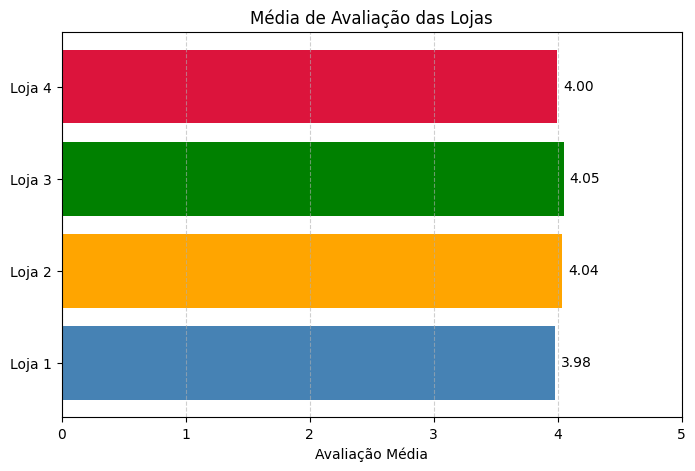

In [7]:
import matplotlib.pyplot as plt

medias_avaliacao = [
    media_avaliacao_loja,
    media_avaliacao_loja2,
    media_avaliacao_loja3,
    media_avaliacao_loja4
]

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

cores = ["steelblue", "orange", "green", "crimson"]

plt.figure(figsize=(8,5))
bars = plt.barh(lojas, medias_avaliacao, color=cores)

plt.title("Média de Avaliação das Lojas")
plt.xlabel("Avaliação Média")
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.6)

for bar in bars:
    largura = bar.get_width()
    plt.text(largura + 0.05, bar.get_y() + bar.get_height()/2, f"{largura:.2f}", va='center')

plt.show()


# 4. Produtos Mais e Menos Vendidos

In [8]:
produtos_vendidos_loja = loja['Produto'].value_counts()
produtos_vendidos_loja2 = loja2['Produto'].value_counts()
produtos_vendidos_loja3 = loja3['Produto'].value_counts()
produtos_vendidos_loja4 = loja4['Produto'].value_counts()

print("*** Loja 1")
print("produtos mais vendidos:")
print(produtos_vendidos_loja.head(3).to_string())

print("\nprodutos menos vendidos:")
print(produtos_vendidos_loja.tail(3).to_string())

print("\n*** Loja 2")
print("produtos mais vendidos:")
print(produtos_vendidos_loja2.head(3).to_string())

print("\nprodutos menos vendidos:")
print(produtos_vendidos_loja2.tail(3).to_string())

print("\n*** Loja 3")
print("produtos mais vendidos:")
print(produtos_vendidos_loja3.head(3).to_string())

print("\nprodutos menos vendidos:")
print(produtos_vendidos_loja3.tail(3).to_string())

print("\n*** Loja 4")
print("produtos mais vendidos:")
print(produtos_vendidos_loja4.head(3).to_string())

print("\nprodutos menos vendidos:")
print(produtos_vendidos_loja4.tail(3).to_string())




*** Loja 1
produtos mais vendidos:
Produto
Micro-ondas      60
TV Led UHD 4K    60
Guarda roupas    60

produtos menos vendidos:
Produto
Panela de pressão    35
Headset              33
Celular ABXY         33

*** Loja 2
produtos mais vendidos:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61

produtos menos vendidos:
Produto
Mesa de jantar       34
Impressora           34
Jogo de tabuleiro    32

*** Loja 3
produtos mais vendidos:
Produto
Kit banquetas     57
Mesa de jantar    56
Cama king         56

produtos menos vendidos:
Produto
Mochila             36
Micro-ondas         36
Blocos de montar    35

*** Loja 4
produtos mais vendidos:
Produto
Cama box                   62
Faqueiro                   59
Dashboards com Power BI    56

produtos menos vendidos:
Produto
Violão           37
Guarda roupas    34
Guitarra         33


# 5. Frete Médio por Loja


In [9]:
frete_medio_loja = loja["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()

print("*** Loja 1")
print(f"Frete médio: R$ {frete_medio_loja:.2f}\n")

print("*** Loja 2")
print(f"Frete médio: R$ {frete_medio_loja2:.2f}\n")

print("*** Loja 3")
print(f"Frete médio: R$ {frete_medio_loja3:.2f}\n")

print("*** Loja 4")
print(f"Frete médio: R$ {frete_medio_loja4:.2f}\n")


*** Loja 1
Frete médio: R$ 34.69

*** Loja 2
Frete médio: R$ 33.62

*** Loja 3
Frete médio: R$ 33.07

*** Loja 4
Frete médio: R$ 31.28



(0.0, 41.63016589861379)

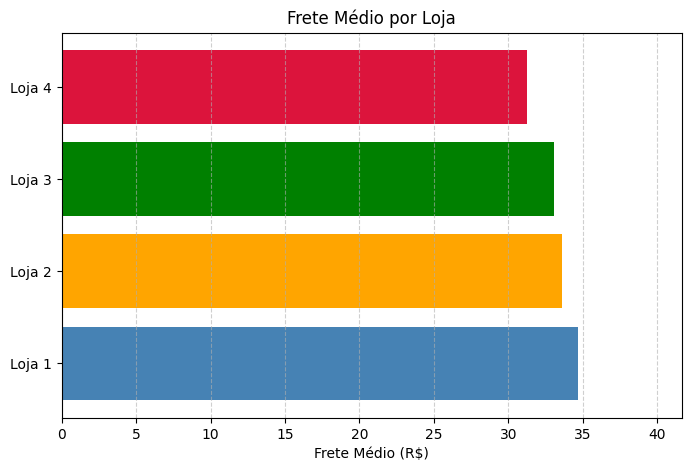

In [10]:
import matplotlib.pyplot as plt

fretes_medios = [
    frete_medio_loja,
    frete_medio_loja2,
    frete_medio_loja3,
    frete_medio_loja4
]

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
cores = ["steelblue", "orange", "green", "crimson"]

plt.figure(figsize=(8,5))
barras = plt.barh(lojas, fretes_medios, color=cores)

plt.xlabel("Frete Médio (R$)")
plt.title("Frete Médio por Loja")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xlim(0, max(fretes_medios) * 1.2)



In [11]:
total_vendas_loja = len(loja)
total_vendas_loja2 = len(loja2)
total_vendas_loja3 = len(loja3)
total_vendas_loja4 = len(loja4)

dados_lojas = {
    "Loja 1": {
        "faturamento": faturamento_loja,
        "avaliacao": media_avaliacao_loja,
        "frete": frete_medio_loja,
        "vendas": total_vendas_loja
    },
    "Loja 2": {
        "faturamento": faturamento_loja2,
        "avaliacao": media_avaliacao_loja2,
        "frete": frete_medio_loja2,
        "vendas": total_vendas_loja2
    },
    "Loja 3": {
        "faturamento": faturamento_loja3,
        "avaliacao": media_avaliacao_loja3,
        "frete": frete_medio_loja3,
        "vendas": total_vendas_loja3
    },
    "Loja 4": {
        "faturamento": faturamento_loja4,
        "avaliacao": media_avaliacao_loja4,
        "frete": frete_medio_loja4,
        "vendas": total_vendas_loja4
    }
}

pontos_negativos = {loja: 0 for loja in dados_lojas}

loja_menor_faturamento = min(dados_lojas, key=lambda x: dados_lojas[x]["faturamento"])
pontos_negativos[loja_menor_faturamento] += 2

loja_pior_avaliacao = min(dados_lojas, key=lambda x: dados_lojas[x]["avaliacao"])
pontos_negativos[loja_pior_avaliacao] += 1

loja_maior_frete = max(dados_lojas, key=lambda x: dados_lojas[x]["frete"])
pontos_negativos[loja_maior_frete] += 1

loja_menor_venda = min(dados_lojas, key=lambda x: dados_lojas[x]["vendas"])
pontos_negativos[loja_menor_venda] += 2

loja_para_vender = max(pontos_negativos, key=pontos_negativos.get)

print(f"\n➡️ Loja recomendada para venda: **{loja_para_vender}**")
print("\nMotivos:")

if loja_para_vender == loja_menor_faturamento:
    print("- Menor faturamento.")
if loja_para_vender == loja_pior_avaliacao:
    print("- Pior avaliação dos clientes.")
if loja_para_vender == loja_maior_frete:
    print("- Maior frete médio.")
if loja_para_vender == loja_menor_venda:
    print("- Menor número total de vendas (baixa rotatividade).")

print("\n **** Conclusão: Essa loja apresenta baixo desempenho em múltiplas métricas, sendo a opção mais estratégica para venda.")




➡️ Loja recomendada para venda: **Loja 4**

Motivos:
- Menor faturamento.
- Menor número total de vendas (baixa rotatividade).

 **** Conclusão: Essa loja apresenta baixo desempenho em múltiplas métricas, sendo a opção mais estratégica para venda.
